# Python example for Climatic Research Unit (CRU) time-series (TS)

## CRU TS data

The following guide will assist with the manipulation and visualisation of the Climatic Research Unit (CRU) gridded time-series (TS) dataset. For more information on this data, or to understand the ways in which it can be downloaded, please see the CEDA CRU data user guide.

Search for the data in the CEDA Archive using Linux commands. Now we know the filname. 

In [2]:
! ls /badc/cru/data/cru_ts/cru_ts_4.02/data/tmp/cru_ts4.02.1901.2017.tmp.dat.nc

/badc/cru/data/cru_ts/cru_ts_4.02/data/tmp/cru_ts4.02.1901.2017.tmp.dat.nc


## Python data visualisation example 

##### Next we will use Python. The following will give a brief explanation of what each part of the code does in this script and may suggest ways in which this can be modified to adapt to different scenarios:

The code below is put at the beginning of the script to add the specific packages (tools) that are needed in python to achieve the outcome

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs

Now we can read in the data to the program so it can be viewed, manipulated and displayed as required. The text within the quotation marks is the file path. As we know the data is on the CEDA Archive, we can read it directly from the path we used above

In [4]:
filename = "/badc/cru/data/cru_ts/cru_ts_4.02/data/tmp/cru_ts4.02.1901.2017.tmp.dat.nc"
data = Dataset(filename)

To understand a bit more about what's inside the NetCDF file, you can print the variable names:

In [5]:
print(data.variables.keys())

odict_keys(['lon', 'lat', 'time', 'tmp', 'stn'])


The .keys() method provides only the variable names, without this you will get additional metadata. Each dimension in the file also has a variable, so you will see a variable for each dimension, in this case:
<ul>
<li>'lat' for latitudes<\li>
<li>'lon' for longitudes<\li>
<li>'time' for time<\li><\li>
<li>'tmp' for near surface temperature<\li>

Next, the temperature, longitude and latitude variables are set. This allows the temperature data to be used within the script. If another parameter is required from the data, that variable should be selected. 

In [6]:
temp = data.variables['tmp'][:]
lon = data.variables['lon'][:]
lat = data.variables['lat'][:]

### Plot 1 - Global Map

The temperature variable that has been set as 'temp' in the code above, is a function of latitude, longitude and time as it is 3-dimensional. To produce a map plot, the temperature values need to be averaged across the entire time period of the dataset. This will give 1 average value per grid point. The line below averages the temperature variable by the time axis. You could pick specific years that you want to view by subsetting the data, the below is similar to the climatology.

In [7]:
temp_av_1901_2017= np.mean(temp[:,:,:],axis = 0)

Firstly we will plot using Basemap, then we will explore other plotting methods. Now the gridded average has been calculated, the following code shows how a map can be plotted with this data. This example plot is for the globe. To create a regional map, change the llcrnrlat, llcrnrlon, urcrnrlat and urcrnrlon which are the lat/lon values of the lower left and upper right corners of the map.

<ul>
<li>Basemap(projection="cyl", resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180) sets the Basemap settings. To set up the desired Basemap, the projection, resolution, latitude and longitude extent needs to be defined. The latitude and longitude extent determine what area will be shown on the map (this example is global)</li>
<li>'cmap=plt.cm.viridis' is the colour used to display the data, this can be changed by amending the last word.</li>
<li>'temp_av_1901_2017' is the data which we defined in the code above</li>
<li>plt.title("text") defines the title which will go on the map plot, this can be changed depending on the parameter being plotted</li>
<li>cb= map.colorbar(im1,"bottom",size="5%",pad="2%", extend='both') creates a colour bar scale for the map</li>
<li>cb.set_label(u"Temperature \u2103") adds a label for the colour bar, this can be changed dependent on the parameter being plotted (adding u before the quote marks and \u2103 within the quote marks adds the symbol for degrees Celsius)</li>
<li>plt.savefig("text.png") is the name and format the map image will be saved as. This can be changed.</li>
</ul>

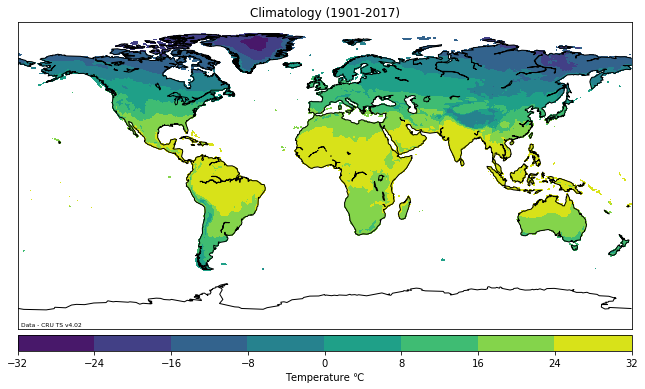

<Figure size 432x288 with 0 Axes>

In [8]:
plot1=plt.figure(figsize=(11,8))

map = Basemap(projection="cyl", resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180) 
map.drawcoastlines(color="black") 

lons,lats = np.meshgrid(lon, lat) 
x,y = map(lons, lats)

temp_plot = map.contourf(x, y, temp_av_1901_2017, cmap=plt.cm.viridis) 
cb = map.colorbar(temp_plot, "bottom", size="5%", pad="2%", extend = 'both')
cb.set_label(u"Temperature \u2103")

plt.title("Climatology (1901-2017)")
plt.annotate('Data - CRU TS v4.02',(-178,-88), fontsize=6)
plt.show() 
plt.savefig("cruts_global.png")

### Plot 2 - Global Map using Cartopy

Next we are going to plot using the cartopy module to create a contour map, this is to show a different method of plotting maps. The code below slices the temperature data so we now have the temperature data between 1961 and 1990 and the temperature data for just 2017 only. This allows us to calculate a 2017 anomaly value, compared to our reference period (1961-1990).

In [9]:
temp_1961_1990 = np.mean(temp[720:1080,:,:],axis = 0)

temp_2017 = np.mean(temp[1392:1404,:,:],axis=0)

temp_2017_anom = temp_2017 - temp_1961_1990

The text below describes line by line how to plot this map using cartopy:
<ul>
<li>plt.figure(figsize=(11,8)) This line sets up the figure we plan to plot. Figsize is just setting a size for the image so we can see it clearly.<\li>
<li>ax = plt.axes(projection=ccrs.PlateCarree()) This line plots the axes using the specific cartopy projection we have specified. There are many other projections, such as; ccrs.Robinson(), ccrs.Mercator(), ccrs.Orthographic(), ccrs.InterruptedGoodeHomolosine().<\li>
<li>The cartopy.mpl.geoaxes.GeoAxes class has many options - here we have added coastlines (ax.coastlines()) and zoomed the map out as much as possible (ax.set_global()).<\li>
<li>ax.contourf(lon, lat, temp_2017_anom,extend='both', transform=ccrs.PlateCarree(), cmap='bwr') - This line plots the data (filled contours). We have provided our latitude, longitude and temperature values as well as the projection and colours.<\li>
<li>plt.colorbar(cs, orientation='horizontal', aspect=75, pad=0.08) This line is setting up the colour bar scale below, similar to the one above but slightly different settings.<\li>
<li>ax.contour(lon, lat, temp_2017_anom, colors='k', linestyles='solid', transform=ccrs.PlateCarree()) This code plots the contour lines.<\li>
<li>plt.clabel(cs, fmt = '%d', colors = 'k', fontsize=10) - the settings here are for the labels on the contour lines.<\li>
<li> ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree()) and ax.set_yticks(np.arange(-90, 91, 30)) set up the ticks and labels around the map to show the longitude and latitde values of the earth.<\li>
<\ul>

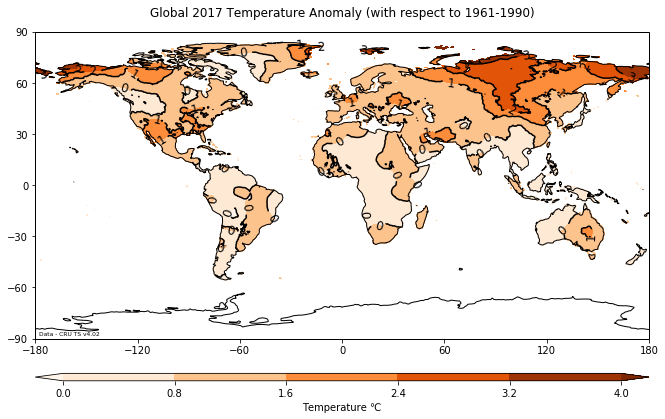

<Figure size 432x288 with 0 Axes>

In [10]:
plot_2=plt.figure(figsize=(11,8)) 

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()

cs = ax.contourf(lon, lat, temp_2017_anom,extend='both', transform=ccrs.PlateCarree(), cmap='Oranges')
cb_2 = plt.colorbar(cs, orientation='horizontal', aspect=75, pad=0.08)
cb_2.set_label(u"Temperature \u2103")
cs = ax.contour(lon, lat, temp_2017_anom, colors='k', linestyles='solid', transform=ccrs.PlateCarree())
plt.clabel(cs, fmt = '%d', colors = 'k', fontsize=12) 

ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30))

title = plt.title('Global 2017 Temperature Anomaly (with respect to 1961-1990)', y=1.03)
plt.annotate('Data - CRU TS v4.02',(-178,-88), fontsize=6)
plt.show()
plt.savefig("cruts_global_cont.png")

### Plot 3 - Timeseries

Next we will create a time series graph. For the time series graph, the data needs to be averaged in a different way. To create a time series plot, the data needs to be averaged across all grid points, so there is 1 global value vs time. The line of code below does exactly this. 

In [11]:
global_average= np.mean(temp[:,:,:],axis=(1,2))

To reduce the seasonal noise in this time series graph, an annual average needs to be calculated from the monthly data. The code below reshapes the global average into [117,12] as there are 117 years in the dataset, each with 12 months. Then the average is calculated for each year. These new annual average values are saved as 'annual_temp'.

In [12]:
annual_temp = np.mean(np.reshape(global_average, (117,12)), axis = 1)

For this plot, it is useful to look at the temperature values as an anomaly to a certain temperature period. The following code calculates the annual temperature anomaly in comparison to the average temperature in 1961-1990. The first line calculates the average temperature value for this time period (1961-1990). This is done by slicing the data with the indices 60:89 as this gives the values from 1961-1990, then averaging these values. The second line then deducts the average temperature value between 1961-1990 from each of the annual temperature values calculated above, saving it as 'temp_anomaly'.

In [13]:
av_1961_1990=np.mean(annual_temp[60:90])

temp_anomaly = annual_temp - av_1961_1990

The following code plots a time series graph. The anomaly data calculated above is plotted against time, in years. 

<ul>
<li>plt.ylim sets a limit for the y-axis so the data can be viewed more clearly</li>
<li>plt.title displays a title on the plot, this can be changed depending on the parameter being plotted</li>
<li>plt.ylabel displays a label for the y-axis, in this case it is temperature that is being displayed but this can be changed depending on the parameter being plotted</li>
<li>The last line is the name and format the graph will be saved as. This can be changed. </li>

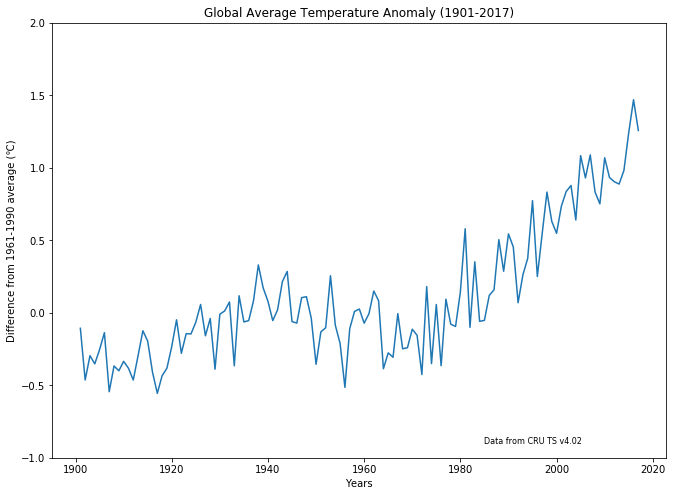

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(11,8))

years = np.arange(1901,2018,1)
plt.plot(years,temp_anomaly)
plt.ylim(np.floor(min(temp_anomaly)), np.ceil(max(temp_anomaly))) 

plt.title("Global Average Temperature Anomaly (1901-2017)")
plt.xlabel("Years") 
plt.ylabel(u"Difference from 1961-1990 average (\u2103)") 

plt.text(1985, -0.9, "Data from CRU TS v4.02", fontsize=8)
plt.show()
plt.savefig('temp_anom_ts.png')

### Exporting and saving subsets of data

This section will explain some methods of exporting subsets of data you have created so you can plot that data or save it for something else. We will also create a spatial and temporal subset of rainfall data and export this to show the complete workflow.

##### Saving data to a NetCDF file

We have calculated a global temperature anomaly subset, where the values in 2017 are compared to a reference period (1961-1990). For this subset, the temperature data is a function of latitude and longitude so we are going to save it in a NetCDF file.

*Explain here

In [17]:
ncfile =  Dataset('global_temp_anomaly_2017.nc', mode='w',format='NETCDF4_CLASSIC')

In [18]:
lat_dim = ncfile.createDimension('lat', 360)
lon_dim = ncfile.createDimension('lon', 720)

In [19]:
ncfile.title = 'CRU TS v4.02 Global temperature anomaly for 2017 (wrt 1961-1990)'

In [20]:
lat_var = ncfile.createVariable('lat',np.float32,('lat',))
lat_var.units = 'degrees_north'
lat_var.long_name = 'latitude'

lon_var = ncfile.createVariable('lon', np.float32, ('lon',))
lon_var.units = 'degrees_east'
lon_var.long_name = 'longitude'

temp_var = ncfile.createVariable('tmp', np.float, ('lat','lon'))
temp_var.units = 'K'
temp_var.standard_name = 'air_temperature'
print(temp_var)

<class 'netCDF4._netCDF4.Variable'>
float64 tmp(lat, lon)
    units: K
    standard_name: air_temperature
unlimited dimensions: 
current shape = (360, 720)
filling on, default _FillValue of 9.969209968386869e+36 used



In [21]:
lat_var[:] = lat
lon_var[:] = lon
temp_var[:,:] = temp_2017_anom

(360, 720)
-0.28110504150390625


In [22]:
ncfile.close()

In [23]:
!ncdump -h global_temp_anomaly_2017.nc

netcdf global_temp_anomaly_2017 {
dimensions:
	lat = 360 ;
	lon = 720 ;
variables:
	float lat(lat) ;
		lat:units = "degrees_north" ;
		lat:long_name = "latitude" ;
	float lon(lon) ;
		lon:units = "degrees_east" ;
		lon:long_name = "longitude" ;
	double tmp(lat, lon) ;
		tmp:units = "K" ;
		tmp:standard_name = "air_temperature" ;

// global attributes:
		:title = "CRU TS v4.02 Global temperature anomaly for 2017 (wrt 1961-1990)" ;
}


##### Exporting a spatial subset

In [24]:
! ls /badc/cru/data/cru_ts/cru_ts_4.02/data/pre/cru_ts4.02.1901.2017.pre.dat.nc

/badc/cru/data/cru_ts/cru_ts_4.02/data/pre/cru_ts4.02.1901.2017.pre.dat.nc


Using Python we will now read in precipitation data and subset the data to obtain the UK region only.

In [53]:
import xarray as xr
import csv

rain_ds = xr.open_dataset('/badc/cru/data/cru_ts/cru_ts_4.02/data/pre/cru_ts4.02.1901.2017.pre.dat.nc')

lat_bnds, lon_bnds = [50, 60], [-6, 2]

rain = rain_ds.pre.sel(lat=slice(*lat_bnds), lon=slice(*lon_bnds))
rain_array = rain.values
print(rain_array.shape)

(1404, 20, 16)


In [52]:
rain_data = rain_array.tolist()
with open('cru_pre_uk.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerows(rain_data)

##### Exporting a temporal subset

use the rainfall data again to just slice for 1 year and export that as another format